In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from pydataset import data

### Answer with the type of test you would use (assume normal distribution):
- Is there a difference in grades of students on the second floor compared to grades of all students?
- Are adults who drink milk taller than adults who dont drink milk?
- Is the the price of gas higher in texas or in new mexico?
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?


> #### Is there a difference in grades of students on the second floor compared to grades of all students?

Steps: 
- Create Hypothesis
- Look for normalization (assumed normal)
- Determine sample
- Determine tails/directionality

##### H$_0$
- students grades on the secons floor == all student grades

##### H$_a$
- students grades on the second floor != all student grades

##### Sample:
- 1 sample 

##### Tails/Directionality
- two tails, no directionality, only eqaulity or difference
    
 Answer: I would se stats.ttest_1samp

> #### Are adults who drink milk taller than adults who dont drink milk?

Steps:
- Create hypothesis
- Look for normalizaiton (assumed normal)
- Determine number of samples
- Determine tails/directionality

##### H$_0$
- adults who drink milk height <= adults who DON'T drink milk

##### H$_a$
- adults who drink milk height > adults who DON'T drink milk

##### Sample
- 2 samples: adults who drink milk, and adults who dont drink milk are both samples of a larger population of ___

##### Tails/Directionaltiy
- 1 tail: We are looking for directionality, we want to test the null hypothesis to see if the adults who don't drink mile are equal height or greater height than adults who drink milk

##### Test:
- I think a stats.ttest_ind would be the correct test()
- this test would first need to determin the variance of the two variables
- In the test, I would be sure to make sure the arguements are int eh correct order with the one being tested as larger first
- If the p_value/2 is less than alpha then there is confidence in the result, we divide the p_vslue by two becasue we want to test for the directionailty

> #### Is the the price of gas higher in texas or in new mexico?

Steps:
- Create Hypothesis
- Look for normality(assumed normal)
- Detemine number of samples
- Determine tails/directionality

##### H$_0$
- tx gas > nm gas

##### H$_a$
- tx gas <= nm gas

##### Sample
- 2 samples, the samples are avg gas prices from two different states - the population may be gas prices int he country

##### Tails/Directionality
- 1 tail, it is directional. We want to know which is higher

##### Test:
- I would test for covariance with the levene first
- Test stats.ttest_ind(tx_gas, nm_gas, equal_var=True)
    - (p_val/2) < alpha and t.test > 0 then we cannot reject the null 
    - (p_val/2) < alpha and t.test =< 0 then we can reject the null

> #### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

Step:
- Hypotheses
- Normality? (assume normal)
- Determine Sample
- Determine Tail
- Determine Tests

##### H$_0$
- stress levels
    - ds == wd
    - ds == ca
    - wd == ca

##### H$_a$
- Stress levels:
    - ds != wd
    - ds != ca
    - wd != ca

##### Sample
- Each one has 2 samples so we will look for independence/exclusivity

##### Tails/Directionality
- 2 tails - no directionality, looking for equality

##### Test
- Because 2 samples, check covariance
- If independent, stats.ttest_ind(arg1, arg1, equal_var=?) 
    - position of args do not matter 
- p < alpha then reject null
- p > alpha then cannot reject null



### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Steps
- Hypothesis
- Look for normailty
- Determine samples
- Detrmine tails

#### Hypothesis 
>##### H$_0$
>- office 1 home sell time == office 2 home sell time

>##### H$_a$
>- office 1 home sell time != office 2 home sell time

#### Normalized?

In [19]:
# Office 1
μ_one = 90 # days
σ_one = 12

office_one_dist = stats.norm(μ_one, σ_one)

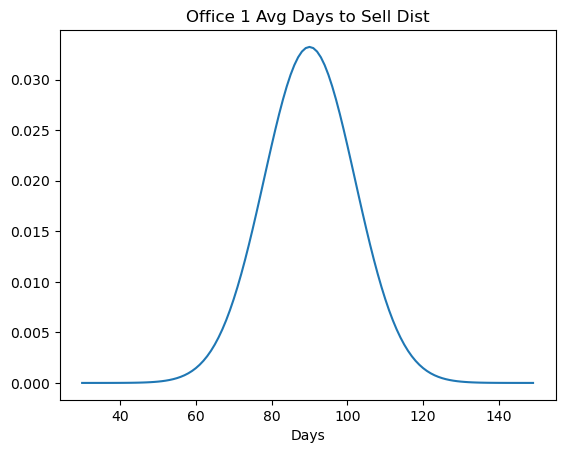

In [26]:
# plotting office 1
x = np.arange(30, 150)
y = [office_one_dist.pdf(i) for i in x]

plt.plot(x, y)
plt.title('Office 1 Avg Days to Sell Dist')
plt.xlabel('Days')
plt.show;

In [28]:
# Office 2
μ_two = 100 # days
σ_two = 20

office_two_dist = stats.norm(μ_two, σ_two)

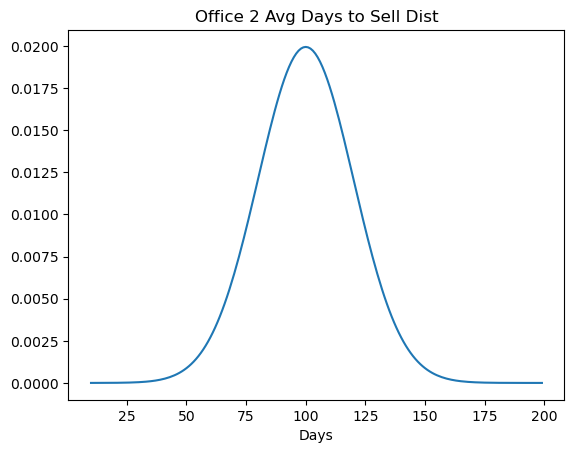

In [30]:
# plotting
x = np.arange(10, 200)
y = [office_two_dist.pdf(i) for i in x]

plt.plot(x, y)
plt.title('Office 2 Avg Days to Sell Dist')
plt.xlabel('Days')
plt.show;

In [31]:
# both are normal, we may continue with the ttest without making adjustments

#### Sample
- There are 2 samples, with two samples we need to check for exclusivity
    - I am going to assumed exclusivity because of we havent learned how to determine exclusivity yet
    - ttest_ind
- But, I believe we must test the covariance on these two to see if they are not equal

In [ ]:
# Null is that the covariance is the same
# Alt is that the covariance is different

#### Tails/Directionality
- There is not directionality becasue we are looking for difference and equality, therefore when testing for the p-value, we only need to have it be less than alpha

In [34]:
# set α
α = 0.05

# Begin the ttest
t_stats, p_val = stats.ttest_ind_from_stats(μ_one, σ_two, 40, μ_two, σ_two, 50)

In [42]:
# testing the p_val
p_val < α, t_stats

(True, -2.3570226039551585)

We reject the null hypothesis!

## Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [92]:
# loading mpg into 'mpg'
mpg = data('mpg')

In [93]:
# St alpha
α = 0.05

> ### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

#### Hypothesis:
##### H$_0$
    2008 fuel efficiency == 1999 fuel efficiency
   
##### H$_a$
    2008 fuel efficiency != 1999 fuel efficiency

In [49]:
# check data
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [108]:
# There are two mileages, must take the averag of bothe and create a new columne with the average
mpg['fl_effcncy'] = mpg[['cty','hwy']].mean(axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fl_effcncy
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [80]:
# Isolating each 2008 cars and 1999 cars and placing into individual variables
mpg_ninetynine = mpg[mpg.year == 1999].fl_effcncy
# mpg_ninetynine

In [79]:
mpg_oeight = mpg[mpg.year == 2008].fl_effcncy
# mpg_oeight

#### Normalized?

creating charts to check for normalization starting with 1999 cars

setting mu and sigma
μ_ninetynine, σ_ninetynine = mpg_ninetynine.mean(), mpg_ninetynine.std()
μ_ninetynine, σ_ninetynine

creating the distributions
mpg_ninetynine_dist = stats.norm(μ_ninetynine, σ_ninetynine)

creating graph
x = np.arange(1, 40)
y = [mpg_ninetynine_dist/pdf(i) for i in x]

plt.plot(x, y)
plt.title('Fuel Efficiency of Cars From 1999 Dist')
plt.xlabel('MPG')
plt.show()

(array([32., 13., 12., 38., 12.,  5.,  2.,  0.,  1.,  2.]),
 array([13.  , 15.65, 18.3 , 20.95, 23.6 , 26.25, 28.9 , 31.55, 34.2 ,
        36.85, 39.5 ]),
 <BarContainer object of 10 artists>)

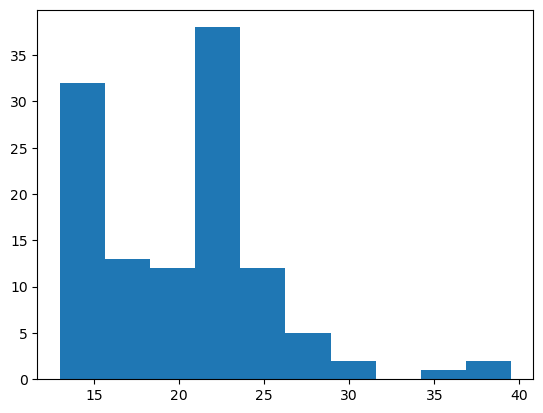

In [87]:
plt.hist(mpg_ninetynine)

(array([ 7.,  5., 32.,  4., 19., 22., 15.,  8.,  2.,  3.]),
 array([10.5, 12.7, 14.9, 17.1, 19.3, 21.5, 23.7, 25.9, 28.1, 30.3, 32.5]),
 <BarContainer object of 10 artists>)

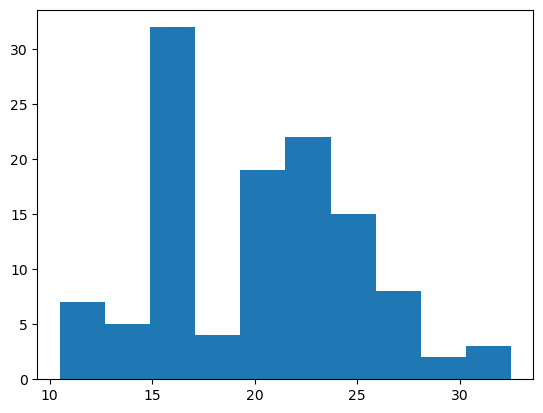

In [90]:
plt.hist(mpg_oeight)

# They dont look normal to meeeee

#### Sample
- There are two samples, are they independent? not sure
    - but lets check for the variance within to determine if they have equal variance


In [94]:
# Sub-Null: the two variables have equal variance
# Sub-Alt: the two variables have unequal variance

stats.levene(mpg_ninetynine, mpg_oeight)[1] < α

### They we cannot reject the null hypothesis, so we will assume that they have the same variance

False

#### Tails/directionality
- 2 tails, becasue we are not looking for directionality

In [96]:
# Finding the t statistic and pvalue
t_stats, p_val = stats.ttest_ind(mpg_ninetynine, mpg_oeight, equal_var=True)

In [99]:
# checking for confidence
p_val < α

# we cannot confidently reject the null hypothesis

False

> ### Are compact cars more fuel-efficient than the average car?

In [117]:
# create variable for compact car fuel
compact_fuel = mpg[mpg['class'] == 'compact'].fl_effcncy
# compact_fuel

In [116]:
# create a variable for all car fuel effeciency
avg_car_fuel = mpg.fl_effcncy
avg_car_fuel

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: fl_effcncy, Length: 234, dtype: float64

#### Hypothesis:

##### H$_0$
    compact cars fuel efficiency <= avg car fuel efficiency

##### H$_a$
    compact car fuel efficiency > avg car fuel efficiency

####  Normal?

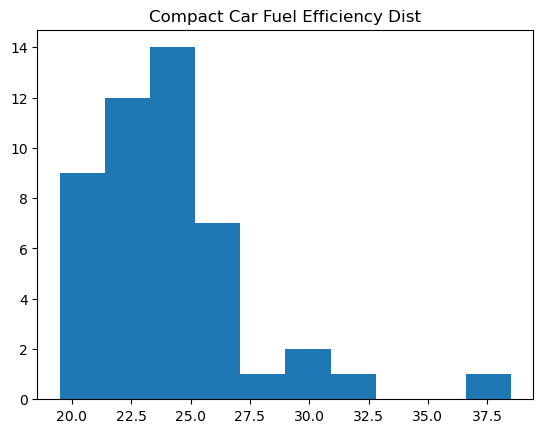

In [119]:
plt.hist(compact_fuel)
plt.title('Compact Car Fuel Efficiency Dist')
plt.show()

# Appears to be right skewed

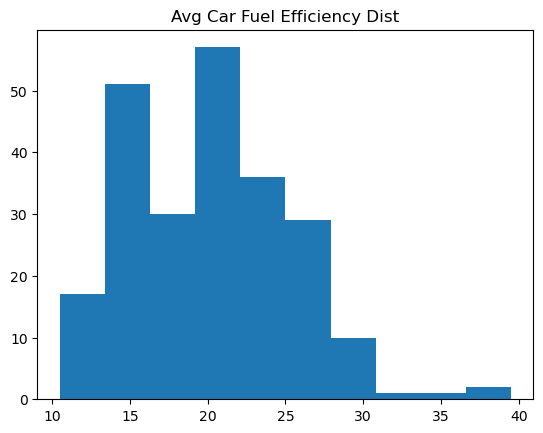

In [122]:
plt.hist(avg_car)
plt.title('Avg Car Fuel Efficiency Dist')
plt.show()

# relatively normal

#### Determine Sample
- 1 sample, this means we will use the stats.ttest_1samp to find our t stat and pvalue
    - no need to look for variance comparison
- with the one sample test we need to create a theoretical mean

#### Determine Tails/Directionality
- 1 tail, we are looking for directionality
    - for the testing of the null, the avg car fuel efficiency will come first in the test

In [132]:
# Create the theoretical mean
μth = avg_car_fuel.mean()
# Creating the test
t_stat, p_val = stats.ttest_1samp(compact_fuel, μth)

In [137]:
# testing the p_value and the t_stat
(p_val / 2) < α, t_stats > 0

(True, True)

In [138]:
# Both are true so we can reject the null hypothesis

> ### Do manual cars get better gas mileage than automatic cars?

In [145]:
# Setting the variable for the auto transmission 
auto_trans_mpg = mpg[mpg.trans.str.startswith('auto')].fl_effcncy

In [148]:
# Variable for man trans mpg
man_trans_mpg = mpg[mpg.trans.str.startswith('man')].fl_effcncy

#### Hypothesis

##### H$_0$
    man trans gas mileage <= auto trans gas mileage

##### H$_a$
    man tran gas mileage > autotrans gas mileage

#### Normal? 

(array([ 6., 35., 27., 20., 35., 18.,  9.,  4.,  2.,  1.]),
 array([10.5 , 12.95, 15.4 , 17.85, 20.3 , 22.75, 25.2 , 27.65, 30.1 ,
        32.55, 35.  ]),
 <BarContainer object of 10 artists>)

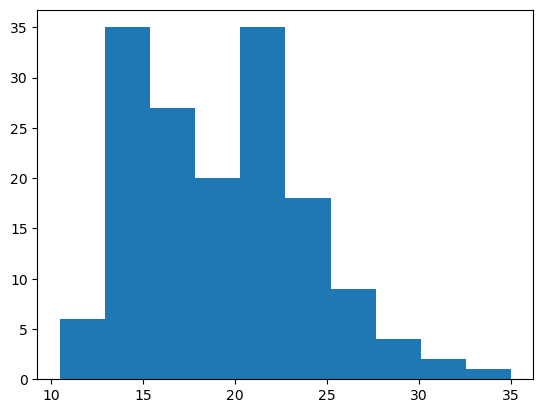

In [150]:
plt.hist(auto_trans_mpg)

(array([ 1., 10.,  8., 22., 10., 19.,  4.,  1.,  0.,  2.]),
 array([10.5, 13.4, 16.3, 19.2, 22.1, 25. , 27.9, 30.8, 33.7, 36.6, 39.5]),
 <BarContainer object of 10 artists>)

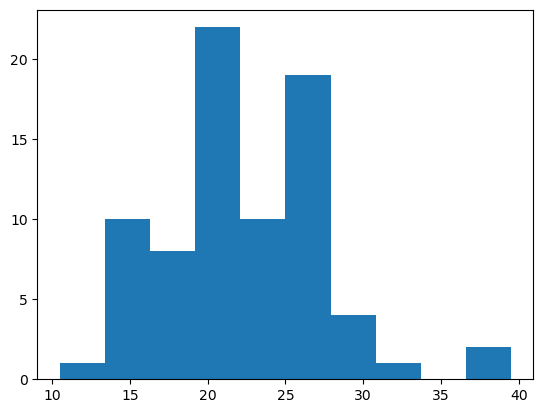

In [152]:
plt.hist(man_trans_mpg)

#### Detemine Sampling
- 2 samples, will use ttest_ind()
    - What about variiance? Lets see

In [154]:
# SubNull: the varince is the same for both
# SubAlt: the variance is different

stats.levene(auto_trans_mpg, man_trans_mpg)[0] < α

# we cannot reject the null, will assume the variance is the same

False

#### Determine Tails/Directionality
- 1 tail becasue looking for greater than or equal to
    - position arguments correctly
    - pvalue / 2
  

In [157]:
# Setup the test
t_stats, p_val = stats.ttest_ind(auto_trans_mpg, man_trans_mpg, equal_var=True)

In [162]:
(p_val/2 < α) and t_stat > 0

True